## Dataset analysis

Import necessary packages:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

Load and display the first few rows of the dataset:

In [2]:
df = pd.read_csv('train_ship_segmentations_v2.csv')

print(df.head())

         ImageId                                      EncodedPixels
0  00003e153.jpg                                                NaN
1  0001124c7.jpg                                                NaN
2  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
3  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
4  000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [3]:
# Basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231723 entries, 0 to 231722
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ImageId        231723 non-null  object
 1   EncodedPixels  81723 non-null   object
dtypes: object(2)
memory usage: 3.5+ MB
None


Number of total images:

In [4]:
total_images = df['ImageId'].nunique()
total_images

192556

Just in case removing dublicates:

In [5]:
df = df.drop_duplicates()
df

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
...,...,...
231718,fffedbb6b.jpg,NaN
231719,ffff2aa57.jpg,NaN
231720,ffff6e525.jpg,NaN
231721,ffffc50b4.jpg,NaN


Number of images with segmentations:

In [6]:
df['EncodedPixels'].notna().sum()

81723

Number of images without segmentations:

In [7]:
df['EncodedPixels'].isna().sum()

150000

Saving all images without ships to a separate dataset:

In [8]:
without_segm = df[df['EncodedPixels'].isna()]
without_segm

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
8,0001b1832.jpg,NaN
20,0002d0f32.jpg,NaN
21,000303d4d.jpg,NaN
...,...,...
231718,fffedbb6b.jpg,NaN
231719,ffff2aa57.jpg,NaN
231720,ffff6e525.jpg,NaN
231721,ffffc50b4.jpg,NaN


Since we are building semantic segmentation model, we do not need the pictures without ships, so we can drop them.

In [9]:
df = df.dropna()
df

,ImageId,EncodedPixels
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
5,000194a2d.jpg,198320 10 199088 10 199856 10 200624 10 201392...
6,000194a2d.jpg,55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...
...,...,...
231694,fff909871.jpg,441057 2 441825 4 442592 7 443360 9 444128 11 ...
231709,fffcb6464.jpg,222782 4 223550 10 224318 14 225086 14 225854 ...
231712,fffd924fb.jpg,110011 5 110779 5 111547 5 112315 5 113083 5 1...
231713,fffd924fb.jpg,198440 8 199208 8 199976 8 200744 8 201512 8 2...


Sample images:

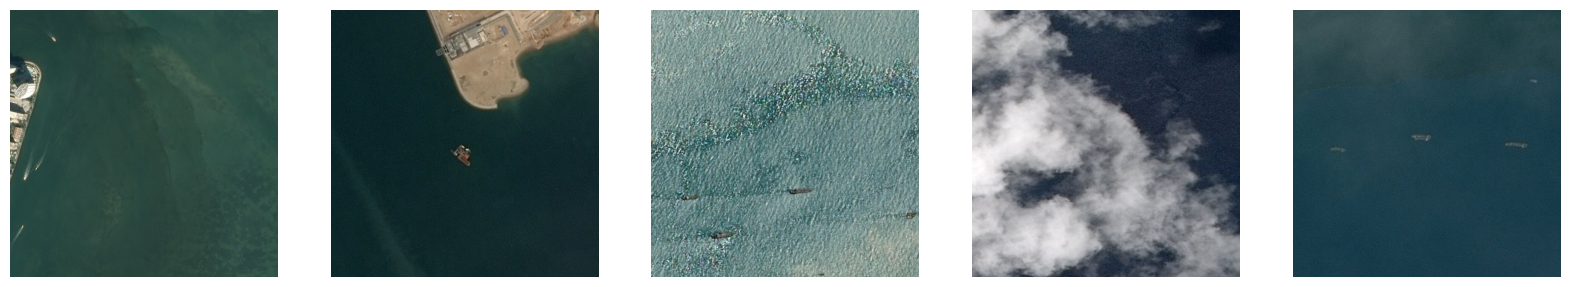

In [10]:
def show_images(images, num = 5):
    plt.figure(figsize=(20,10))
    for i in range(num):
        img = Image.open(images[i])
        plt.subplot(1, num, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

sample_images = [os.path.join('train_v2', img) for img in df['ImageId'].sample(5)]
show_images(sample_images)

Removing from the train folder all the images without ships:

In [12]:
for image_id in without_segm['ImageId']:
    file_path = os.path.join('train_v2', image_id)
    if os.path.exists(file_path):  
        os.remove(file_path)
        print('removed!')

removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
removed!
r

Looking at the images size and width and height distribution:

768 768


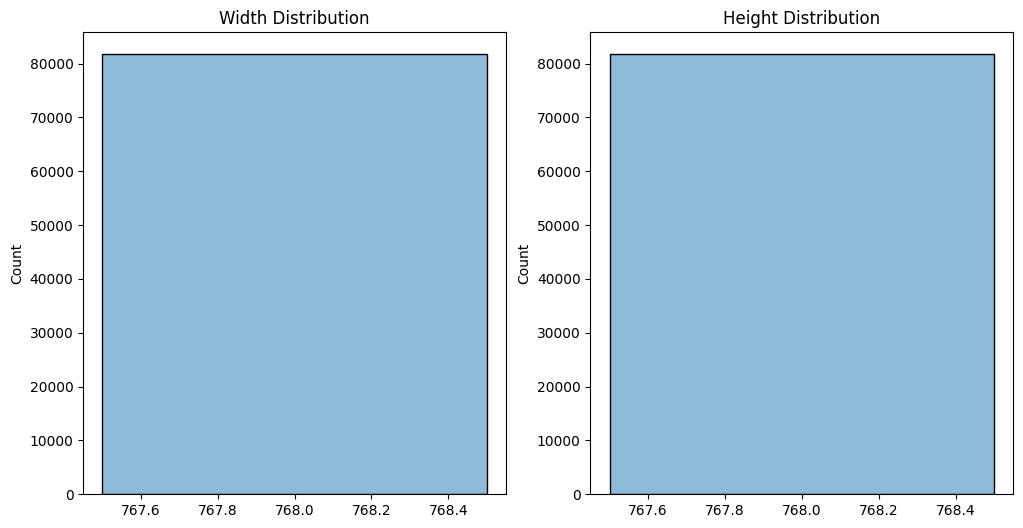

In [13]:
def get_image_sizes(df, image_path_column):
    widths, heights = [], []
    for img_name in df[image_path_column]:
        img_path = os.path.join('train_v2', img_name)
        with Image.open(img_path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
    return widths, heights

widths, heights = get_image_sizes(df, 'ImageId')
print(widths[0], heights[0])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(widths, kde=True)
plt.title('Width Distribution')

plt.subplot(1, 2, 2)
sns.histplot(heights, kde=True)
plt.title('Height Distribution')

plt.show()